# Title: Disease Prediction and Medical Recommendation System

# Import Libraries and load dataset

In [14]:
# import all the required libraries

import  pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import numpy as np

# loading the dataset
dataset = pd.read_csv('kaggle_dataset/Training.csv')

# printing the dataset
dataset.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Splitting into train and test dataset

In [15]:
X_train = dataset.drop('prognosis', axis=1)
y = dataset['prognosis']

# ecoding prognonsis
le = LabelEncoder()
le.fit(y)
Y_train = le.transform(y)

# Splitting into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=20)

# Training the prediction models

In [16]:
# Create a dictionary to store models
prediction_models = {
    'SVC': SVC(kernel='linear'),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
}

X_test = pd.DataFrame(X_test, columns=X_train.columns)

for name_of_model, model in prediction_models.items():
    
    model.fit(X_train, y_train)                                                 #Training the model

    test_predictions = model.predict(X_test)                                     # Testing the model

    model_accuracy = accuracy_score(y_test, test_predictions)                    # Accuracy of the model
    print(f"{name_of_model} Accuracy: {model_accuracy} \n")

    # Calculating confusion matrix for all models
    cm = confusion_matrix(y_test, test_predictions)
    print(f"{name_of_model} Confusion Matrix: \n")
    print(np.array2string(cm, separator=', '))


SVC Accuracy: 1.0 

SVC Confusion Matrix: 

[[24,  0,  0, ...,  0,  0,  0],
 [ 0, 27,  0, ...,  0,  0,  0],
 [ 0,  0, 18, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 24,  0,  0],
 [ 0,  0,  0, ...,  0, 33,  0],
 [ 0,  0,  0, ...,  0,  0, 22]]
RandomForest Accuracy: 1.0 

RandomForest Confusion Matrix: 

[[24,  0,  0, ...,  0,  0,  0],
 [ 0, 27,  0, ...,  0,  0,  0],
 [ 0,  0, 18, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 24,  0,  0],
 [ 0,  0,  0, ...,  0, 33,  0],
 [ 0,  0,  0, ...,  0,  0, 22]]
GradientBoosting Accuracy: 1.0 

GradientBoosting Confusion Matrix: 

[[24,  0,  0, ...,  0,  0,  0],
 [ 0, 27,  0, ...,  0,  0,  0],
 [ 0,  0, 18, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 24,  0,  0],
 [ 0,  0,  0, ...,  0, 33,  0],
 [ 0,  0,  0, ...,  0,  0, 22]]


### Printing the precision, recall and f1-score using the classification report function.

In [17]:
# Printing the classification report to get the precision, recall and f1-score for our dataset.

print("\n", classification_report(y_test, test_predictions))


               precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        28
           5       1.00      1.00      1.00        26
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        25
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        35
          10       1.00      1.00      1.00        24
          11       1.00      1.00      1.00        30
          12       1.00      1.00      1.00        23
          13       1.00      1.00      1.00        18
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        24
          16       1.00      1.00      1.00        19
          17       1.00  

# Selecting Random Forest model

In [18]:
# selecting Random Forest Model

Rf = RandomForestClassifier(n_estimators=100, random_state=42)
Rf.fit(X_train,y_train)
ypred = Rf.predict(X_test)
accuracy_score(y_test,ypred)

1.0

# Saving and loading the pickle file

In [19]:
# saving Random Forest
import pickle
pickle.dump(Rf,open('model/RandomForest.pkl','wb'))
# loading the model
Rf = pickle.load(open('model/RandomForest.pkl','rb'))


# Testing the predictions

In [20]:
# first test:
print("Disease Predicted :",Rf.predict(X_test.iloc[0].values.reshape(1,-1)))
print("Actual Disease :", y_test[0])

import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")

Disease Predicted : [40]
Actual Disease : 40


In [21]:
# second test:
print("Disease Predicted :",Rf.predict(X_test.iloc[100].values.reshape(1,-1)))
print("Actual Disease :", y_test[100])

import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")


Disease Predicted : [39]
Actual Disease : 39


# Loading the database for Prediction 

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
symptoms = pd.read_csv("kaggle_dataset/symptoms_df.csv")
precautions = pd.read_csv("kaggle_dataset/precautions_df.csv")
workout = pd.read_csv("kaggle_dataset/workout_df.csv")
description = pd.read_csv("kaggle_dataset/description.csv")
medications = pd.read_csv("kaggle_dataset/medications.csv")
diets = pd.read_csv("kaggle_dataset/diets.csv")

# Basic structure and overview
datasets = [symptoms, precautions, workout, description, medications, diets]
dataset_names = ["Symptoms", "Precautions", "Workout", "Description", "Medications", "Diets"]

for name, data in zip(dataset_names, datasets):
    print(f"Dataset: {name}")
    print(data.head(), "\n")
    print(data.info(), "\n")


Dataset: Symptoms
   Unnamed: 0           Disease   Symptom_1              Symptom_2  \
0           0  Fungal infection     itching              skin_rash   
1           1  Fungal infection   skin_rash   nodal_skin_eruptions   
2           2  Fungal infection     itching   nodal_skin_eruptions   
3           3  Fungal infection     itching              skin_rash   
4           4  Fungal infection     itching              skin_rash   

               Symptom_3             Symptom_4  
0   nodal_skin_eruptions   dischromic _patches  
1    dischromic _patches                   NaN  
2    dischromic _patches                   NaN  
3    dischromic _patches                   NaN  
4   nodal_skin_eruptions                   NaN   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4920 non-null   int64 
 1   Disease     4920 non-null   object

###  Making disctionary of symptoms and diseases
### Building a information function to extract the description, precaution, medication, diet and workout details from the dataset

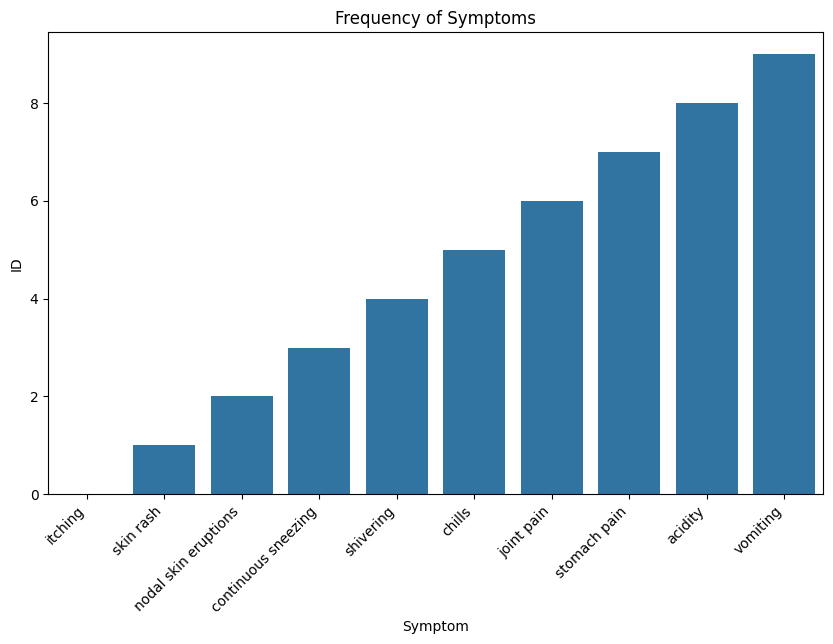

C:\Users\HP\AppData\Local\Temp\ipykernel_10400\307836403.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=diseases_df["Disease"], x=diseases_df["ID"], palette="viridis")


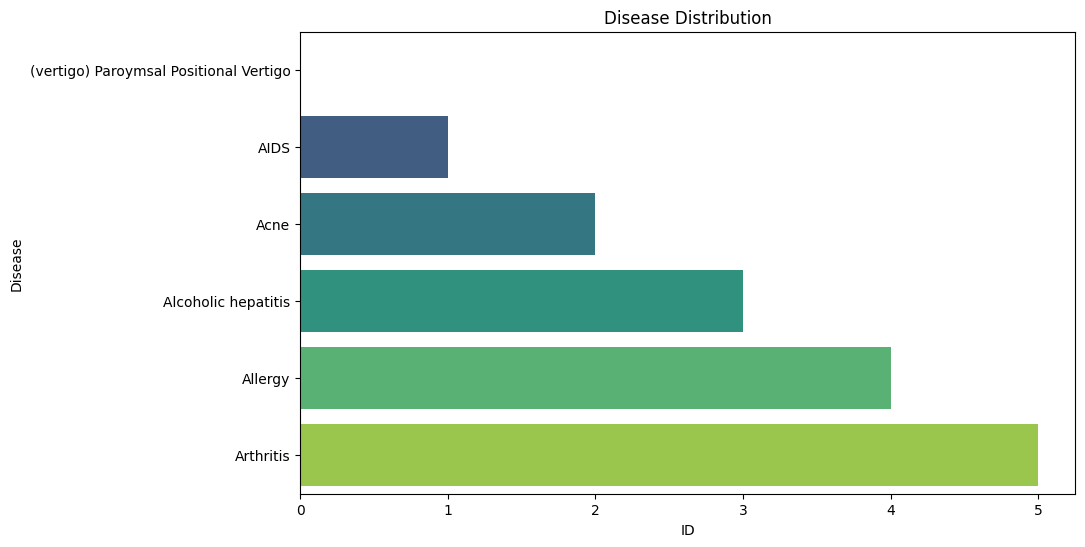

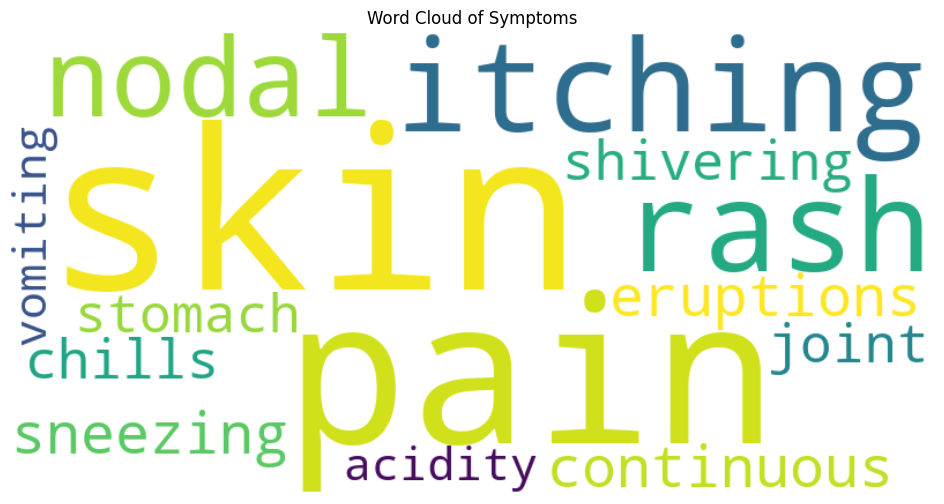

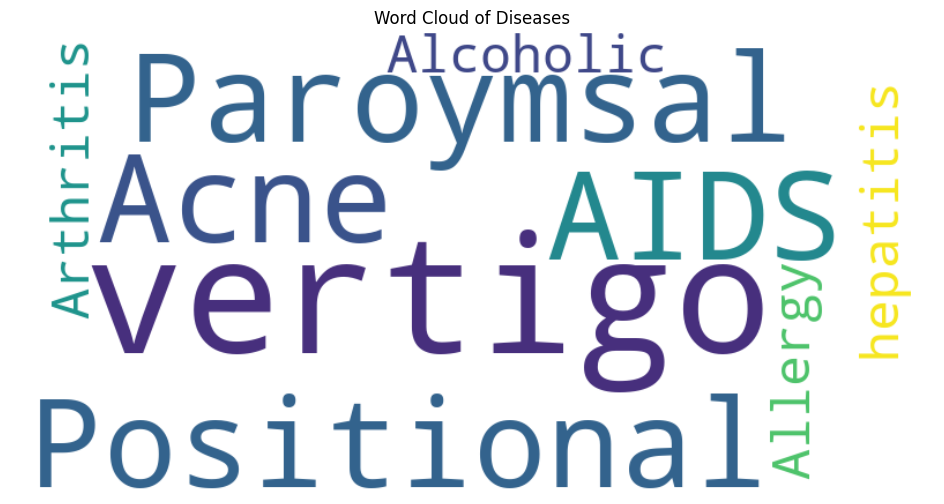

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Symptom and disease dictionaries (example subset for demonstration)
symptoms_list = {
    'itching': 0,
    'skin_rash': 1,
    'nodal_skin_eruptions': 2,
    'continuous_sneezing': 3,
    'shivering': 4,
    'chills': 5,
    'joint_pain': 6,
    'stomach_pain': 7,
    'acidity': 8,
    'vomiting': 9
}

diseases_list = {
    0: '(vertigo) Paroymsal Positional Vertigo',
    1: 'AIDS',
    2: 'Acne',
    3: 'Alcoholic hepatitis',
    4: 'Allergy',
    5: 'Arthritis'
}

# Processed symptoms list (replace underscores with spaces)
symptoms_list_processed = {symptom.replace('_', ' ').lower(): value for symptom, value in symptoms_list.items()}

# Create dataframes for visualization
symptoms_df = pd.DataFrame(list(symptoms_list_processed.items()), columns=["Symptom", "ID"])
diseases_df = pd.DataFrame(list(diseases_list.items()), columns=["ID", "Disease"])

# Symptom frequency visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=symptoms_df["Symptom"], y=symptoms_df["ID"])
plt.xticks(rotation=45, ha="right")
plt.title("Frequency of Symptoms")
plt.xlabel("Symptom")
plt.ylabel("ID")
plt.show()



# Disease distribution visualization
plt.figure(figsize=(10, 6))
sns.barplot(y=diseases_df["Disease"], x=diseases_df["ID"], palette="viridis")
plt.title("Disease Distribution")
plt.xlabel("ID")
plt.ylabel("Disease")
plt.show()

# Word cloud for symptoms
symptoms_text = " ".join(symptoms_list_processed.keys())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(symptoms_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Symptoms")
plt.show()

# Word cloud for diseases
diseases_text = " ".join(diseases_list.values())
wordcloud_disease = WordCloud(width=800, height=400, background_color="white").generate(diseases_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_disease, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Diseases")
plt.show()



### Prediction Model function

In [24]:
# Prediction Model function
def predicted_value(patient_symptoms):
    i_vector = np.zeros(len(symptoms_list_processed))
    for i in patient_symptoms:
        i_vector[symptoms_list_processed[i]] = 1
    return diseases_list[Rf.predict([i_vector])[0]]

In [25]:
from fuzzywuzzy import process

# Defining a function to correct the spelling of symptoms using fuzzy matching
def correct_spelling(symptom):
    # Getting the best match for the symptom from the list of known symptoms
    matched_symptom, score = process.extractOne(symptom, list(symptoms_list_processed.keys()))
    if score >= 80:
        return matched_symptom
    else:
        return None

In [ ]:
from termcolor import colored
import matplotlib.pyplot as plt
import seaborn as sns

# Function to visualize disease-related data
def visualize_disease_data(disease_precautions, disease_medications, disease_diet, disease_workout):
    # Visualize the precautions
    plt.figure(figsize=(8, 4))
    plt.barh(range(len(disease_precautions[0])), disease_precautions[0], color='skyblue')
    plt.title("Precautions for the Predicted Disease", fontsize=14)
    plt.xlabel("Precautions", fontsize=12)
    plt.yticks(range(len(disease_precautions[0])), [f"P{idx+1}" for idx in range(len(disease_precautions[0]))])
    plt.tight_layout()
    plt.show()

    # Visualize the medications
    plt.figure(figsize=(8, 4))
    sns.barplot(y=disease_medications, x=[1] * len(disease_medications), palette="coolwarm")
    plt.title("Recommended Medications", fontsize=14)
    plt.xlabel("Medication")
    plt.ylabel("Count")
    plt.yticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Visualize diet and workout
    if disease_diet:
        plt.figure(figsize=(8, 4))
        plt.bar(range(len(disease_diet)), [1] * len(disease_diet), tick_label=disease_diet, color="green")
        plt.title("Diet Recommendations", fontsize=14)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    if disease_workout:
        plt.figure(figsize=(8, 4))
        plt.bar(range(len(disease_workout)), [1] * len(disease_workout), tick_label=disease_workout, color="orange")
        plt.title("Workout Recommendations", fontsize=14)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


# Main code for disease prediction
symptoms = input("Describe your symptoms: ")
patient_symptoms = [s.strip() for s in symptoms.split(',')]  # Splitting the symptom input into a list

corrected_symptoms = []
for symptom in patient_symptoms:
    # Correcting the spelling of each symptom using fuzzy matching
    corrected_symptom = correct_spelling(symptom.lower())
    if corrected_symptom:
        corrected_symptoms.append(corrected_symptom)
    else:
        print(colored(f"Symptom '{symptom}' not found in the database.", "red"))

# Proceed only if at least one corrected symptom is found
if corrected_symptoms:
    # Predict the disease based on the corrected symptoms
    predicted_disease = predicted_value(corrected_symptoms)
    # Fetching information about the predicted disease
    disease_description, disease_precautions, disease_medications, disease_diet, disease_workout = information(predicted_disease)

    # Display predicted disease
    print("\n" + colored("Predicted Disease:", "cyan", attrs=["bold"]), colored(predicted_disease, "yellow", attrs=["bold"]))
    
    # Display the description of the disease
    print("\n" + colored("Description:", "cyan", attrs=["bold"]))
    print(colored(disease_description, "white"))

    # Display precautions
    if disease_precautions[0]:
        print("\n" + colored("Precautions:", "cyan", attrs=["bold"]))
        for idx, precaution in enumerate(disease_precautions[0], start=1):
            print(colored(f"{idx}. {precaution}", "green"))

    # Display medications
    if disease_medications:
        print("\n" + colored("Medications:", "cyan", attrs=["bold"]))
        for idx, medication in enumerate(disease_medications, start=1):
            print(colored(f"{idx}. {medication}", "blue"))

    # Display workout routine
    if disease_workout:
        print("\n" + colored("Workout:", "cyan", attrs=["bold"]))
        for idx, workout in enumerate(disease_workout, start=1):
            print(colored(f"{idx}. {workout}", "magenta"))

    # Display diet recommendations
    if disease_diet:
        print("\n" + colored("Diets:", "cyan", attrs=["bold"]))
        for idx, diet in enumerate(disease_diet, start=1):
            print(colored(f"{idx}. {diet}", "yellow"))

    # Visualize data
    visualize_disease_data(disease_precautions, disease_medications, disease_diet, disease_workout)

else:
    print(colored("No valid symptoms provided. Please try again.", "red"))
